In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from analysis import *

In [ ]:
#number of orders by month
orders_day['ym'] = pd.to_datetime(orders_day['order_date']).dt.strftime('%Y-%m')
orders_mounth = orders_day.groupby('ym').agg({'count_orders':'sum'}).reset_index()
orders_day

Text(2025-04, 992.8571428571429, 'Mean num of purchases')

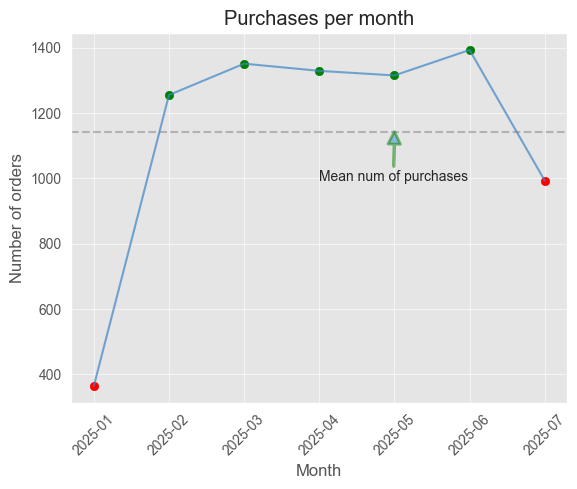

In [52]:
plt.style.use('ggplot')

mean_value = orders_mounth['count_orders'].mean()

orders_mounth['is_lower_than_mean'] = orders_mounth['count_orders'] < mean_value

orders_lower = orders_mounth[orders_mounth['is_lower_than_mean'] == True]
orders_higher = orders_mounth[orders_mounth['is_lower_than_mean'] == False]

#visualization of purchases per month
plt.title('Purchases per month')

plt.xlabel('Month')
plt.ylabel('Number of orders')

plt.plot(orders_mounth['ym'], orders_mounth['count_orders'], alpha=0.7, color='#3d85c6')
plt.scatter(orders_lower['ym'], orders_lower['count_orders'], color='red')
plt.scatter(orders_higher['ym'], orders_higher['count_orders'], color='green')

plt.xticks(rotation=45)

plt.grid(alpha=0.6)

#plt.bar(orders_mounth['ym'], orders_mounth['count_orders'], alpha=0.3, width=0.4)

#show mean value of purchases per month
plt.axhline(y=mean_value, alpha=0.5, linestyle='--', color='gray')

plt.annotate(
    'Mean num of purchases',
    xy=('2025-05', mean_value),
    xytext=('2025-04', mean_value-150),
    arrowprops={
        'width': 0.1,
        'headwidth': 9,
        'headlength': 9,
        'linewidth': 2,
        'edgecolor': 'green',
        'alpha': 0.5,
    }
)


Text(0.5, 1.0, 'Numb of unique users ~ numb of purchases')

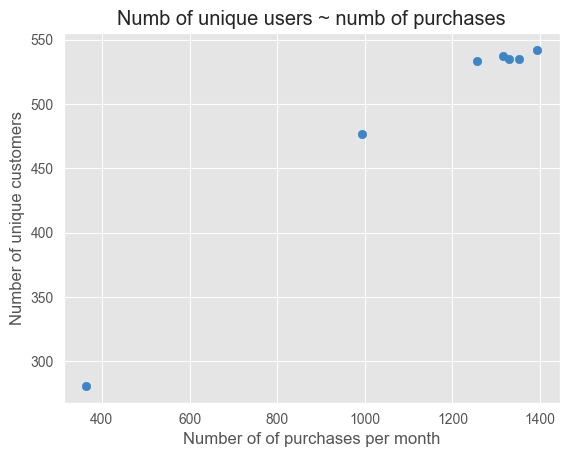

In [53]:
#соотношение количества покупок к количеству уникальных пользователей (в месяц)

#добавим столбец в data формата год-месяц покупки
plt.style.use('ggplot')

data['ym'] = pd.to_datetime(data['order_date']).dt.strftime('%Y-%m')

num_unique_users = data.groupby('ym')['customer_id'].agg({'count', 'nunique'}).reset_index()
plt.scatter(num_unique_users['count'], num_unique_users['nunique'], color='#3d85c6')

plt.xlabel('Number of of purchases per month')
plt.ylabel('Number of unique customers')

plt.title('Numb of unique users ~ numb of purchases')


Text(0.5, 1.0, 'Numb of unique users ~ numb of purchases')

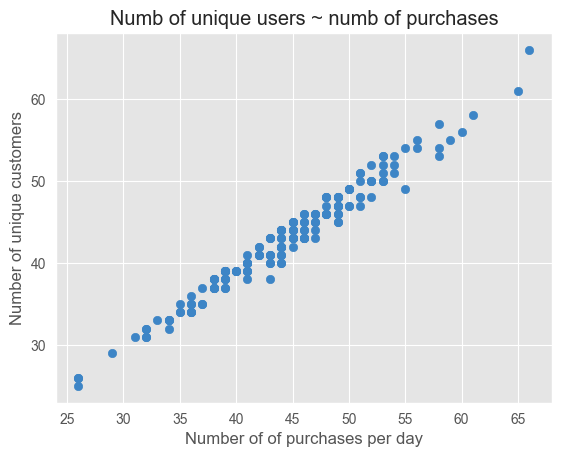

In [54]:
#соотношение количества покупок к количеству уникальных пользователей (по дням)
plt.style.use('ggplot')

num_unique_users_days = data.groupby('order_date')['customer_id'].agg({'count', 'nunique'}).reset_index()
plt.scatter(num_unique_users_days['count'], num_unique_users_days['nunique'], color='#3d85c6')

plt.xlabel('Number of of purchases per day')
plt.ylabel('Number of unique customers')

plt.title('Numb of unique users ~ numb of purchases')

,product,amount
0,TV,12282926.66
1,ipad,7411501.63
2,laptop,10764949.79
3,mouse,719834.59
4,phone,5817294.71
5,watch,3896268.22


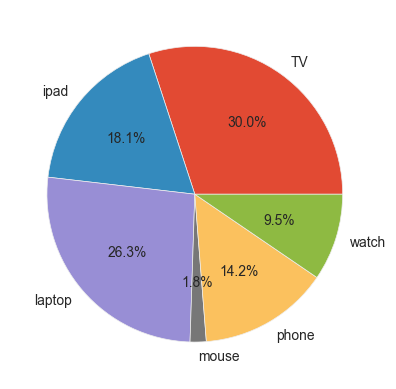

In [57]:
#'pie' to visualize the sum of each product from the product
prod_sum = data.groupby('product')['amount'].agg('sum').reset_index()
plt.pie(prod_sum['amount'], labels=prod_sum['product'], autopct='%1.1f%%')
prod_sum

In [ ]:
data['ym'] = pd.to_datetime(data['order_date']).dt.strftime('%Y-%m')
data_cumsum = data.groupby('ym')['amount'].agg({'sum'}).reset_index()
data_cumsum['cumsum'] = data_cumsum['sum'].cumsum()
data_cumsum

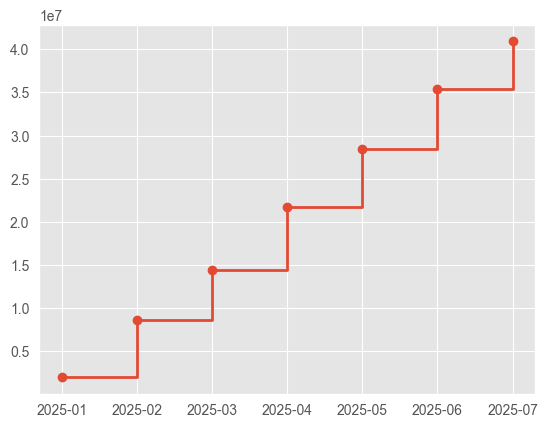

In [71]:
plt.step(data_cumsum['ym'], data_cumsum['cumsum'], where='post', marker='o', linewidth=2)